## Prepare
import and set variable

In [1]:
# -*- coding:UTF-8 -*-

    
from corpus import *
from vsm import *

c.words

# train the model and create a TfViewer object
tf = TF(c, context_type)
tf.train()
tf_v = TfViewer(c, tf)

# print the most frequent terms in the document
# remember that IPython automatically prints the last cell of a document
tf_v.coll_freqs()


# replace 'topic_range[0]' with a specific number, if you like
k = topic_range[4]

# load the topic model
v = lda_v[k]

#v.topics()

#v.doc_topics(v.labels[:3])

v.aggregate_doc_topics(v.labels[:], normed_sum=True)

#v.dist(v.labels[0], v.labels[1])
%matplotlib inline
import matplotlib.pyplot as plt
from numpy.random import randn
import matplotlib.font_manager as fm
myfont = fm.FontProperties(fname='/home/hongliang/Downloads/msyh.ttf/msyh.ttf')
import sys
reload(sys)
kongzi = []
mengzi = []
xunzi =[]

count = 0
for label in v.labels[:]:
    if '孟子' in label:
        mengzi.append(count)
    elif '论语' in label:
        kongzi.append(count)
    elif '荀子' in label:
        xunzi.append(count)
    count += 1



Running from notebook, using serial load function.
[20, 40, 60, 80, 100]
/home/hongliang/inpho/kmx/models/kmx-freq5-freq5-N23423523-LDA-K{0}-document-1500.npz
Loading LDA data from /home/hongliang/inpho/kmx/models/kmx-freq5-freq5-N23423523-LDA-K100-document-1500.npz
Loading LDA data from /home/hongliang/inpho/kmx/models/kmx-freq5-freq5-N23423523-LDA-K100-document-1500.npz


## functions:

In [2]:
# get term frequency in a particular corpus

def term_freq_labels(term,labels):
    count = 0
    for i in labels: 
        index = c.meta_int('document', {'document_label' : v.labels[i]})
        document = c.view_contexts('document', as_strings=True)[index]
        count += (document == term.decode('utf-8')).sum()
    return count
#get the whole occurrances in a corpus

def allfreq(labels):
    countall = 0    
    for i in labels:
        #wenzi = []
        num = []
        index = c.meta_int('document', {'document_label' : v.labels[i]})
        document = c.view_contexts('document', as_strings=True)[index]
        for a in set(document):
            count = 0
            count += (document == a.decode('utf-8')).sum()
            num.append(count)
            #wenzi.append([a,count])
        countall += sum(num)
    
    return countall



## Get list for topics and topics_weight

In [3]:
#1.找到前十的topic的编号
top10topics = []
top10topicsweight = []
for a in v.aggregate_doc_topics(v.labels[:], normed_sum=True):
    top10topics.append(a[0])
    top10topicsweight.append(a[1])
print top10topics[:10]

#2.生成每个topic的值
wordf = []
wordw = []
word=[]
for a in top10topics[:10]:
    for b in v.topics()[a][:10]:
        wordw.append(b[1])
        word.append(b[0])
        wordf.append(tf_v.coll_freq(b[0]))
def chunks(arr, n):
    return [arr[i:i+n] for i in range(0, len(arr), n)]
#print chunks(wordw,10),chunks(word,10),chunks(wordf,10)


## Figure 2  
Keyword loading in Highest Loading Ten Topics in Our Corpus
Figure 2 y label is word-weight
Figure 2.1 y label is frequency

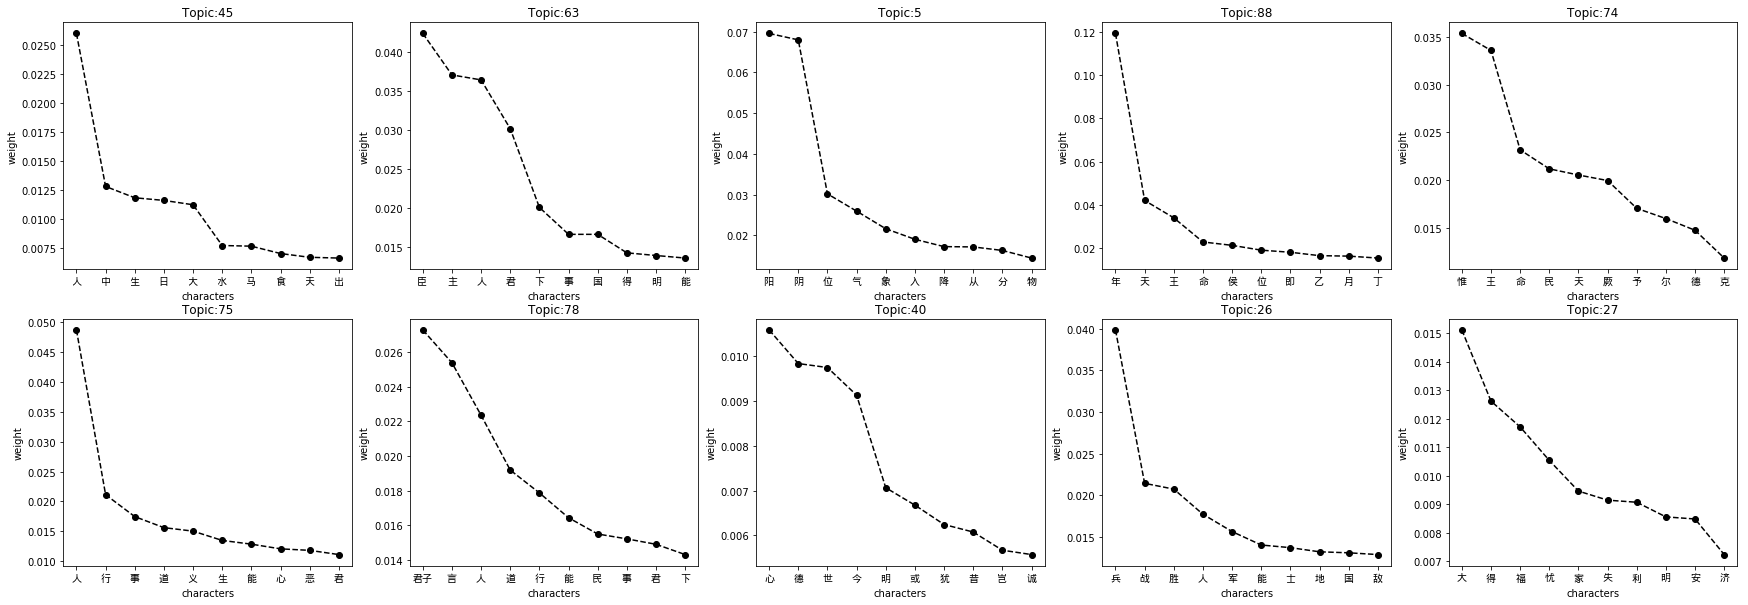

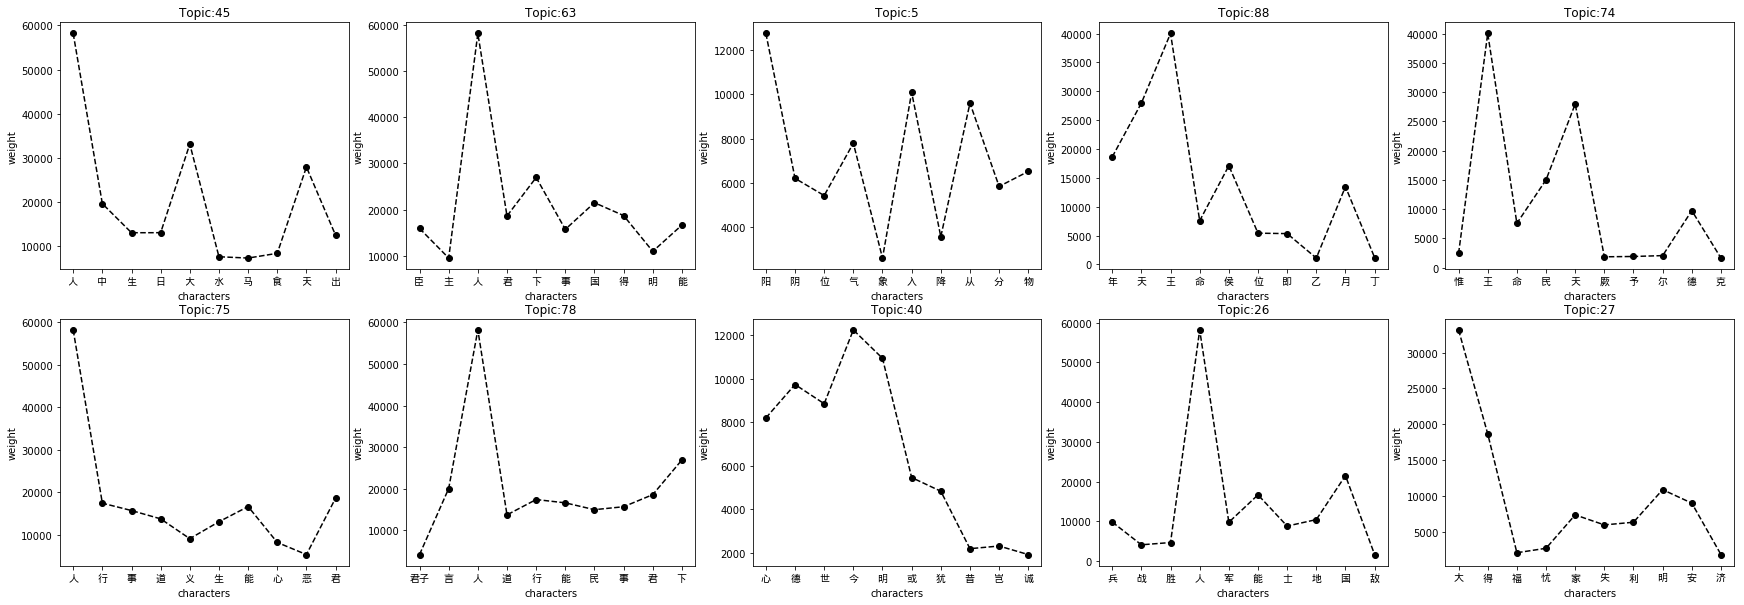

In [4]:
%matplotlib inline
import matplotlib.pyplot as plt
from numpy.random import randn
import matplotlib.font_manager as fm
myfont = fm.FontProperties(fname='wqy-microhei.ttc')
import sys
reload(sys)
sys.setdefaultencoding("utf-8")

fig2 = plt.figure(figsize=(30,10))
for i in range(0,10):
    ax = plt.subplot(2,5,1+i)
    plt.plot(chunks(wordw,10)[i],'ko--')
    ticks = ax.set_xticks(range(0,10))
    labels = ax.set_xticklabels(chunks(word,10)[i],fontproperties=myfont)
    ax.set_xlabel('characters')
    ax.set_ylabel('weight')
    ax.set_title('Topic:%d'%top10topics[i])
plt.savefig('Figure 2')
    
fig21 = plt.figure(figsize=(30,10))
for i in range(0,10):
    ax = plt.subplot(2,5,1+i)
    plt.plot(chunks(wordf,10)[i],'ko--')
    ticks = ax.set_xticks(range(0,10))
    labels = ax.set_xticklabels(chunks(word,10)[i],fontproperties=myfont)
    ax.set_xlabel('characters')
    ax.set_ylabel('weight')
    ax.set_title('Topic:%d'%top10topics[i])
plt.savefig('Figure 21')

## Figure 3 Highest Loading 10 Topics in Corpus
'Topics','Corpus Weight','Topic Keywords in Descending Order of Weight','Topic Name'

In [5]:
v.topics(print_len=10)

[LabeledColumn([(u'\u793c',   4.66177315e-02), (u'\u796d',   3.56281660e-02),
        (u'\u5929',   2.93871798e-02), ..., (u'\u5b5f',   2.70784170e-07),
        (u'\u5e08',   2.70163099e-07), (u'\u8eab',   2.69956075e-07)], 
       dtype=[('word', 'O'), ('value', '<f4')]),
 LabeledColumn([(u'\u738b',   1.09384783e-01), (u'\u695a',   6.88434169e-02),
        (u'\u9f50',   6.86614141e-02), ..., (u'\u8bed',   4.53371143e-07),
        (u'\u6301',   4.53371143e-07), (u'\u5175',   4.52676858e-07)], 
       dtype=[('word', 'O'), ('value', '<f4')]),
 LabeledColumn([(u'\u8c61',   5.79728335e-02), (u'\u5409',   3.41389328e-02),
        (u'\u4e0a',   2.96588745e-02), ..., (u'\u5be1',   8.94151981e-07),
        (u'\u58eb',   8.94151981e-07), (u'\u4ece',   8.88683189e-07)], 
       dtype=[('word', 'O'), ('value', '<f4')]),
 LabeledColumn([(u'\u9053',   5.14051616e-02), (u'\u4eba',   3.71156149e-02),
        (u'\u5929',   3.33321653e-02), ..., (u'\u8015',   3.12390512e-07),
        (u'\u60a6',   3.12271226e-07), (u'\u9b3c',   3.10601337e-07)], 
       dtype=[('word', 'O'), ('value', '<f4')]),
 LabeledColumn([(u'\u77f3',   3.83296572e-02), (u'\u5b98',   3.55035588e-02),
        (u'\u4eba',   3.41493748e-02), ..., (u'\u6b32',   5.87550346e-07),
        (u'\u585e',   5.86651993e-07), (u'\u4f59',   5.84855172e-07)], 
       dtype=[('word', 'O'), ('value', '<f4')]),
 LabeledColumn([(u'\u9633',   6.95693493e-02), (u'\u9634',   6.79849684e-02),
        (u'\u4f4d',   3.01759336e-02), ..., (u'\u7c7b',   7.18952379e-07),
        (u'\u796d',   7.17578757e-07), (u'\u7ae0',   7.17578757e-07)], 
       dtype=[('word', 'O'), ('value', '<f4')]),
 LabeledColumn([(u'\u4e24',   4.08252999e-02), (u'\u5347',   4.03126590e-02),
        (u'\u6c64',   3.97068113e-02), ..., (u'\u4e9a',   4.65780914e-07),
        (u'\u8c0b',   4.65603136e-07), (u'\u536b',   4.64892025e-07)], 
       dtype=[('word', 'O'), ('value', '<f4')]),
 LabeledColumn([(u'\u8d24',   3.69984321e-02), (u'\u4e16',   2.29112469e-02),
        (u'\u80fd',   1.95940174e-02), ..., (u'\u6848',   2.20689969e-07),
        (u'\u7a77',   2.20352533e-07), (u'\u4e71',   2.20015082e-07)], 
       dtype=[('word', 'O'), ('value', '<f4')]),
 LabeledColumn([(u'\u6d4b',   1.15597144e-01), (u'\u6b21',   1.11758173e-01),
        (u'\u5927',   1.66369695e-02), ..., (u'\u5b98',   1.42106057e-06),
        (u'\u53ec',   1.42106057e-06), (u'\u6570',   1.41889097e-06)], 
       dtype=[('word', 'O'), ('value', '<f4')]),
 LabeledColumn([(u'\u661f',   4.60156240e-02), (u'\u6708',   3.60957757e-02),
        (u'\u51fa',   2.08960045e-02), ..., (u'\u5ea6',   3.19331122e-07),
        (u'\u5c71',   3.19331122e-07), (u'\u571f',   3.17378010e-07)], 
       dtype=[('word', 'O'), ('value', '<f4')]),
 LabeledColumn([(u'\u5929',   6.15014620e-02), (u'\u5927',   2.57205870e-02),
        (u'\u4e0b',   2.55802087e-02), ..., (u'\u7591',   1.55652245e-07),
        (u'\u7acb',   1.55652245e-07), (u'\u5b97',   1.55533243e-07)], 
       dtype=[('word', 'O'), ('value', '<f4')]),
 LabeledColumn([(u'\u5b66',   3.37688774e-02), (u'\u4eba',   3.05276383e-02),
        (u'\u7ecf',   1.96545478e-02), ..., (u'\u4eca',   2.29748792e-07),
        (u'\u6781',   2.29573416e-07), (u'\u864e',   2.29573416e-07)], 
       dtype=[('word', 'O'), ('value', '<f4')]),
 LabeledColumn([(u'\u738b',   6.52149990e-02), (u'\u6c49',   3.02076619e-02),
        (u'\u695a',   2.37417184e-02), ..., (u'\u5217',   1.97930248e-07),
        (u'\u515a',   1.97778931e-07), (u'\u5fa1',   1.97627600e-07)], 
       dtype=[('word', 'O'), ('value', '<f4')]),
 LabeledColumn([(u'\u738b',   4.81466465e-02), (u'\u5927',   1.73890851e-02),
        (u'\u6c11',   1.67468134e-02), ..., (u'\u8fbe',   2.37746846e-07),
        (u'\u8d31',   2.37746846e-07), (u'\u610f',   2.37020899e-07)], 
       dtype=[('word', 'O'), ('value', '<f4')]),
 LabeledColumn([(u'\u83bd',   1.66265413e-01), (u'\u6cb3',   2.64995135e-02),
        (u'\u6c34',   2.52456330e-02), ..., (u'\u79e6',   8.34185698e-07),
        (u'

In [6]:
from pandas import Series,DataFrame
import pandas as pd
#data = {"Topics":top10topics[:10], "Corpus Weight":top10topicsweight[:10], "Topic Name":[,,,,,,,,,],"Topic Keywords in Descending Order of Weight":chunks(word,10)} 
keywords = []
for a in chunks(word,10):
    keywords.append('  '.join(a))
topicname =['benevolent rule 德政','ethical rulership道德规范','political affairs 政治事件','political affairs 政治事件','治国','cosmos&astrology 宇宙&占卜','ethics&politics 伦理&政治','political affairs 政治事件','nature&cosmos 自然&宇宙','traditional Chinese medicine 中医']  
data3 = {"Topics":top10topics[:10],"Corpus Weight":top10topicsweight[:10],"Topic Keywords in Descending Order of Weight":keywords,"Topic Name":topicname}
f3 = DataFrame(data3,columns=['Topics','Corpus Weight','Topic Keywords in Descending Order of Weight','Topic Name'])
f3

Topics  Corpus Weight Topic Keywords in Descending Order of Weight  \
0      45       0.036284                 人  中  生  日  大  水  马  食  天  出   
1      63       0.032928                 臣  主  人  君  下  事  国  得  明  能   
2       5       0.032389                 阳  阴  位  气  象  入  降  从  分  物   
3      88       0.032162                 年  天  王  命  侯  位  即  乙  月  丁   
4      74       0.027608                 惟  王  命  民  天  厥  予  尔  德  克   
5      75       0.026913                 人  行  事  道  义  生  能  心  恶  君   
6      78       0.026590                君子  言  人  道  行  能  民  事  君  下   
7      40       0.025194                 心  德  世  今  明  或  犹  昔  岂  诚   
8      26       0.024202                 兵  战  胜  人  军  能  士  地  国  敌   
9      27       0.023038                 大  得  福  忧  家  失  利  明  安  济   

                        Topic Name  
0               benevolent rule 德政  
1            ethical rulership道德规范  
2           political affairs 政治事件  
3           political affairs 政治事件  
4                               治国  
5           cosmos&astrology 宇宙&占卜  
6            ethics&politics 伦理&政治  
7           political affairs 政治事件  
8              nature&cosmos 自然&宇宙  
9  traditional Chinese medicine 中医

##  Figure 4 Corpus weights Topics 0-99



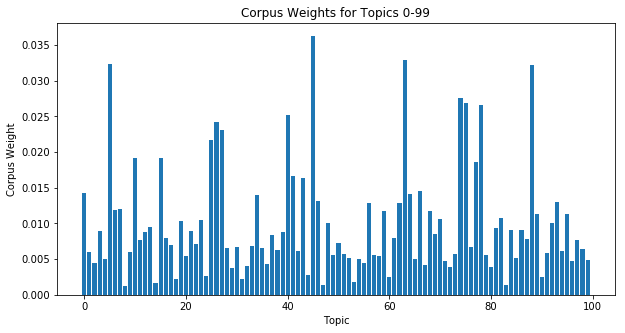

In [7]:
#图四，topic weight 分布

fig4 = plt.figure(figsize=(10,5))
#plt.plot(chunks(wordf,10)[i],'ko--')
plt.bar(top10topics, top10topicsweight)
#plt.ylim(0, max(mean_values) * 1.1)
#ticks = ax.set_xticks(range(0,10))
#labels = ax.set_xticklabels(chunks(word,10)[i],fontproperties=myfont)

plt.xlabel('Topic')  
plt.ylabel('Corpus Weight')  
plt.title('Corpus Weights for Topics 0-99')  
plt.savefig('figure4')

## Figure 5 

They are using topic 34. I just copy the term in their topic

need to find our topic again

In [8]:
term = ['君','人','义','礼','能','贤','莫','天','恶','安']
English = ['nobleman','person','rigteousness','ritual','able','virtuous','do not','day/heaven','evil','peace']

occurrencex = []
occurrencem = []
occurrencek = []

for a in term:
    occurrencek.append(term_freq_labels(a,kongzi))
    occurrencem.append(term_freq_labels(a,mengzi))
    occurrencex.append(term_freq_labels(a,xunzi)) 


    
    
    
k = allfreq(kongzi)
m = allfreq(mengzi)
x = allfreq(xunzi)
k_per_1000 = []
m_per_1000 = []
x_per_1000 = []

for a in occurrencek:
    k_per_1000.append(a*1000/float(k))
for a in occurrencek:
    m_per_1000.append(a*1000/float(m))
for a in occurrencek:
    x_per_1000.append(a*1000/float(x))

Results shows that our numbers are different ， need checked

To do：
Term rank


In [9]:
data5 = {"Mengzi per 1000 characters":m_per_1000,"Xunzi per 1000 characters":x_per_1000,"Kongzi per 1000 characters":k_per_1000,"Term":term,"English":English,"Occurrences in Kongzi":occurrencek,"Occurrences in Mengzi":occurrencem,"Occurrences in Xunzi":occurrencex}
f5 = DataFrame(data5,columns=['Term','English','Occurrences in Kongzi','Kongzi per 1000 characters','Occurrences in Mengzi','Mengzi per 1000 characters','Occurrences in Xunzi','Xunzi per 1000 characters'])
f5

Term       English  Occurrences in Kongzi  Kongzi per 1000 characters  \
0    君      nobleman                     48                    6.348367   
1    人        person                    201                   26.583785   
2    义  rigteousness                     24                    3.174183   
3    礼        ritual                     75                    9.919323   
4    能          able                     67                    8.861262   
5    贤      virtuous                     25                    3.306441   
6    莫        do not                     18                    2.380637   
7    天    day/heaven                     48                    6.348367   
8    恶          evil                     39                    5.158048   
9    安         peace                     17                    2.248380   

   Occurrences in Mengzi  Mengzi per 1000 characters  Occurrences in Xunzi  \
0                    176                    2.583006                   249   
1                    595                   10.816338                  1176   
2                    109                    1.291503                   315   
3                     70                    4.035947                   341   
4                    140                    3.605446                   518   
5                     76                    1.345316                   152   
6                     60                    0.968627                   255   
7                    292                    2.583006                   557   
8                     80                    2.098692                   190   
9                     24                    0.914815                   190   

   Xunzi per 1000 characters  
0                   1.193466  
1                   4.997638  
2                   0.596733  
3                   1.864790  
4                   1.665879  
5                   0.621597  
6                   0.447550  
7                   1.193466  
8                   0.969691  
9                   0.422686

## Figure 6   Topic 27 Keywords & Weight
Topic 27 没有相同内容的topic（白马非法论和坚白论）

In [10]:
Chinese = []
Pinyin = ['tian','yu','shi','jian','gui','long','xiong','bing','ji','ren']
English = ['heaven','rain','time','see','turtle','dragon','ominous','illness','propitious','people']
WordWeight = []
for a in v.topics()[17][:10]:
    Chinese.append(a[0])
    WordWeight.append(a[1])

data6 = {"Chinese":Chinese,"pinyin":Pinyin,"English":English,"word weight":WordWeight}
f6 = DataFrame(data6,columns=['Chinese','pinyin','English','word weight'])
f6

Chinese pinyin     English  word weight
0       大   tian      heaven     0.026301
1       拜     yu        rain     0.025536
2       命    shi        time     0.024661
3       宾   jian         see     0.022200
4       君    gui      turtle     0.021982
5       入   long      dragon     0.021216
6       上  xiong     ominous     0.019740
7       礼   bing     illness     0.019466
8       门     ji  propitious     0.019412
9       再    ren      people     0.016131

## Figure 7 Weightiest 10 topics in each of Analects,Mencius&Xunzi


In [11]:

la = kongzi

topick=[]

keywordsk = []
keywordk=[]
topicweightk=[]

for a in v.aggregate_doc_topics(v.labels[la[0]:la[-1]+1], normed_sum=True)[:10]:
    topick.append(a[0])
    topicweightk.append(a[1])
    
for a in topick:
    for b in v.topics()[a][:10]:
        keywordsk.append(b[0])

        
for a in chunks(keywordsk,10):
    keywordk.append('  '.join(a))

    


In [12]:
data71 = {"Topic":topick,"Keywords":keywordk,"Text Weight in Kongzi":topicweightk}
f71 = DataFrame(data71,columns=['Topic','Keywords','Text Weight in Kongzi'])
f71

Topic                       Keywords  Text Weight in Kongzi
0     78  君子  言  人  道  行  能  民  事  君  下               0.350621
1     19   孔  问  人  闻  言  贡  知  鲁  路  行               0.268587
2     75   人  行  事  道  义  生  能  心  恶  君               0.072234
3     68   人  天  得  义  王  孟  下  知  今  马               0.027525
4     17   大  拜  命  宾  君  入  上  礼  门  再               0.019600
5     45   人  中  生  日  大  水  马  食  天  出               0.019515
6     84   天  下  人  国  王  墨  利  得  上  知               0.015251
7     48   公  桓  管  君  仲  齐  鲁  人  侯  国               0.013612
8      0   礼  祭  天  庙  侯  大  宗  祀  服  王               0.013094
9     74   惟  王  命  民  天  厥  予  尔  德  克               0.011352

In [13]:
la = mengzi

topicm=[]

keywordsm = []
keywordm=[]
topicweightm=[]

for a in v.aggregate_doc_topics(v.labels[la[0]:la[-1]+1], normed_sum=True)[:10]:
    topicm.append(a[0])
    topicweightm.append(a[1])
    
for a in topicm:
    for b in v.topics()[a][:10]:
        keywordsm.append(b[0])

        
for a in chunks(keywordsm,10):
    keywordm.append('  '.join(a))

    

data72 = {"Topic":topicm,"Keywords":keywordm,"Text Weight in Mengzi":topicweightm}
f72 = DataFrame(data72,columns=['Topic','Keywords','Text Weight in Mengzi'])
f72

Topic                       Keywords  Text Weight in Mengzi
0      5   阳  阴  位  气  象  入  降  从  分  物               0.044273
1     88   年  天  王  命  侯  位  即  乙  月  丁               0.043446
2     45   人  中  生  日  大  水  马  食  天  出               0.042295
3     63   臣  主  人  君  下  事  国  得  明  能               0.038910
4     74   惟  王  命  民  天  厥  予  尔  德  克               0.035996
5     78  君子  言  人  道  行  能  民  事  君  下               0.033584
6     75   人  行  事  道  义  生  能  心  恶  君               0.033414
7     27   大  得  福  忧  家  失  利  明  安  济               0.031179
8     26   兵  战  胜  人  军  能  士  地  国  敌               0.028702
9     25   民  国  法  治  上  刑  令  行  官  罚               0.026628

In [14]:
la = xunzi

topicx=[]

keywordsx = []
keywordx=[]
topicweightx=[]

for a in v.aggregate_doc_topics(v.labels[la[0]:la[-1]+1], normed_sum=True)[:10]:
    topicx.append(a[0])
    topicweightx.append(a[1])
    
for a in topicx:
    for b in v.topics()[a][:10]:
        keywordsx.append(b[0])

        
for a in chunks(keywordsx,10):
    keywordx.append('  '.join(a))

    
    
data73 = {"Topic":topicx,"Keywords":keywordx,"Text Weight in Xunzi":topicweightx}
f73 = DataFrame(data73,columns=['Topic','Keywords','Text Weight in Xunzi'])
f73

Topic                       Keywords  Text Weight in Xunzi
0     82   下  人  礼  天  法  王  治  知  今  乱              0.218340
1     75   人  行  事  道  义  生  能  心  恶  君              0.132618
2     78  君子  言  人  道  行  能  民  事  君  下              0.112962
3     63   臣  主  人  君  下  事  国  得  明  能              0.078959
4     77  能  知  物  生  道  欲  得  治  形  所以              0.060967
5      7   贤  世  能  士  公  贵  行  富  用  相              0.038211
6     45   人  中  生  日  大  水  马  食  天  出              0.037986
7     19   孔  问  人  闻  言  贡  知  鲁  路  行              0.030392
8     68   人  天  得  义  王  孟  下  知  今  马              0.021229
9     10   天  大  下  王  德  道  地  人  义  得              0.019262

##
Per 1000 Characters = (tf_v.coll_freq(Term[i])  /  sum(text[]))

## Figure 8 Topics Differentiating Analects, Mencius and Xunzi from one another

In [15]:
kmx=[]
km=[]
kx=[]
dk=[]
mx=[]
dm=[]
dx=[]
for a in range(0,100):
    if a in topick:
        if a in topicm:
            if a in topicx:
                kmx.append(a)
            else:
                km.append(a)
        else:
            if a in topicx:
                kx.append(a)
            else:
                dk.append(a)
    else:
        if a in topicm:
            if a in topicx:
                mx.append(a)
            else:
                dm.append(a)
        else:
            if a in topicx:
                dx.append(a)
print kmx,km,kx,dk,mx,dm,dx
                
        

In [16]:
Document=[]
TextWeight=[]
TOPIC1=[]
corpusweight =[]
name =['','','','history 历史','politician 政治人物','political affairs 政治事件','law and discipline rite 礼法','politics&war 政治&战争','political affairs 政治事件','public office 官职','political affairs&history 政治事件&历史','sacrifice 祭祀','politics&history 政治&历史','individual morality 个人道德','nature&cosmos 自然&宇宙','government 国家治理','government&ethics 政府&伦理']  
keywords=[]

for a in dk:
    
    i = topick.index(a)
    j = top10topics.index(a)
    Document.append('Analects')
    TextWeight.append(topicweightk[i])
    TOPIC1.append(a)
    corpusweight.append(top10topicsweight[j])
    keywords.append(keywordk[i])
for a in dm:
    
    i = topicm.index(a)
    j = top10topics.index(a)
    Document.append('Mengzi')
    TextWeight.append(topicweightm[i])
    TOPIC1.append(a)
    corpusweight.append(top10topicsweight[j])
    keywords.append(keywordm[i])
for a in dx:
    
    i = topicx.index(a)
    j = top10topics.index(a)
    Document.append('Xunzi')
    TextWeight.append(topicweightx[i])
    TOPIC1.append(a)
    corpusweight.append(top10topicsweight[j])
    keywords.append(keywordx[i])
print len(keywords),len(name)

data8 = {"Document":Document,"Text Weight":TextWeight,"Topic":TOPIC1,"Corpus Weight":corpusweight,"Name":name,"keywords":keywords}
f8 = DataFrame(data8,columns=['Document','Text Weight','Topic','Corpus Weight','Name','keywords'])
f8

ValueError: arrays must all be same length

## Figure 9 Topic 5's Text Weights

In [17]:
Text=[]
TextWeight5=[]

#for a in kongzi:
#    Text.append(v.labels[i])
#    for a in 

data9 = {"Text":Text,"Text weight of topic 5":TextWeight5}
f9 = DataFrame(data73,columns=['Text','Text weight of topic 5'])
f9

Empty DataFrame
Columns: [Text, Text weight of topic 5]
Index: []

## Figure 10 Text Weights in A/M/X

In [18]:
la=kongzi
topick=[]
topicweightk=[]
for a in v.aggregate_doc_topics(v.labels[la[0]:la[-1]+1], normed_sum=True):
    topick.append(a[0])
    topicweightk.append(a[1])
la=mengzi
topicm=[]
topicweightm=[]
for a in v.aggregate_doc_topics(v.labels[la[0]:la[-1]+1], normed_sum=True):
    topicm.append(a[0])
    topicweightm.append(a[1])
la=xunzi
topicx=[]
topicweightx=[]
for a in v.aggregate_doc_topics(v.labels[la[0]:la[-1]+1], normed_sum=True):
    topicx.append(a[0])
    topicweightx.append(a[1])

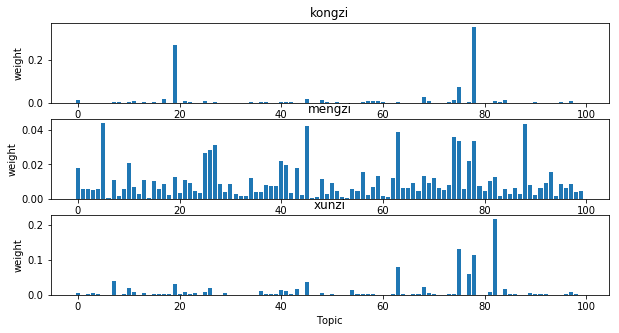

In [19]:
fig10 = plt.figure(figsize=(10,5))

ax10_1 = plt.subplot(3,1,1)
plt.bar(topick, topicweightk)
ax10_1.set_xlabel('Topic')
ax10_1.set_ylabel('weight')
ax10_1.set_title('kongzi')

ax10_2 = plt.subplot(3,1,2)
plt.bar(topicm, topicweightm)
ax10_2.set_xlabel('Topic')
ax10_2.set_ylabel('weight')
ax10_2.set_title('mengzi')

ax10_3 = plt.subplot(3,1,3)
plt.bar(topicx, topicweightx)
ax10_3.set_xlabel('Topic')
ax10_3.set_ylabel('weight')
ax10_3.set_title('xunzi')





plt.savefig('Figure 10')

##  Figure 11 Formal Interpretation Matrix of Intersections of Analects, Mencius and Xunzi with Topic Keywords (∩=intersection of sets)


In [20]:
Document=[]
TextWeight=[]
TOPIC1=[]
corpusweight =[]
name =['ethical rulership 道德规范','benevolent rule 德政','ethics&politics 伦理&政治','kindheartedness 仁','politics&war 政治&战争','filial piety 孝']
keywords=[]

for a in kmx:
    
    i1 = topick.index(a)
    i2 = topicm.index(a)
    i3 = topicx.index(a)
    j = top10topics.index(a)
    Document.append('KMX')
    TextWeight.append(str(topicweightk[i1])+'/'+str(topicweightm[i2])+'/'+str(topicweightx[i3]))
    TOPIC1.append(a)
    corpusweight.append(top10topicsweight[j])

    keywords.append(keywordk[i1])
for a in km:
    
    i1 = topick.index(a)
    i2 = topicm.index(a)
    j = top10topics.index(a)
    Document.append('KM')
    TextWeight.append(str(topicweightk[i1])+'/'+str(topicweightm[i2]))
    TOPIC1.append(a)
    corpusweight.append(top10topicsweight[j])

    keywords.append(keywordm[i2])
for a in kx:
    
    i1 = topick.index(a)
    i3 = topicx.index(a)
    j = top10topics.index(a)
    Document.append('KX')
    TextWeight.append(str(topicweightk[i1])+'/'+str(topicweightx[i3]))
    TOPIC1.append(a)
    corpusweight.append(top10topicsweight[j])

    keywords.append(keywordx[i3])
for a in mx:
    
    i2 = topicm.index(a)
    i3 = topicx.index(a)
    j = top10topics.index(a)
    Document.append('MX')
    TextWeight.append(str(topicweightm[i2])+'/'+str(topicweightx[i3]))
    TOPIC1.append(a)
    corpusweight.append(top10topicsweight[j])

    keywords.append(keywordx[i3])


data11 = {"Document":Document,"Text Weight":TextWeight,"Topic":TOPIC1,"Corpus Weight":corpusweight,"Name":name,"keywords":keywords}
f11 = DataFrame(data11,columns=['Document','Text Weight','Topic','Corpus Weight','Name','keywords'])
f11

ValueError: arrays must all be same length

In [ ]:
print kongzi

##  nichoal paper
### Figure 3 Highest Loading 10 Topics in Corpus

| Corpus | Topic # Weight | Topic Name  |  Topic Keywords in Descending Order of  Weight |

| 29 | 0.600 | Heaven, Cosmos, & the Way | 天 上 下 大 道 中 人 時 後  地 長 從 成 德 |

some words in nc's paper can't be key in function v.dist_word_top. so need a filter.

In [21]:
list1 = ['天','上','下','大','道','中','人','時','後','地','長','從','成','德']
list = []
for a in list1:
    try:
        v.dist_word_top(a.decode('utf-8'))[0]
        list.append(a.decode('utf-8'))
    except:
        print a



In [22]:
v.dist_word_top(list,[10,9,8,7,6,5,4,3,2,1])[:3]


[LabeledColumn([(u'\u9053',   5.14051616e-02), (u'\u4eba',   3.71156149e-02),
        (u'\u5929',   3.33321653e-02), ..., (u'\u8015',   3.12390512e-07),
        (u'\u60a6',   3.12271226e-07), (u'\u9b3c',   3.10601337e-07)], 
       dtype=[('word', 'O'), ('value', '<f4')]),
 LabeledColumn([(u'\u5929',   6.15014620e-02), (u'\u5927',   2.57205870e-02),
        (u'\u4e0b',   2.55802087e-02), ..., (u'\u7591',   1.55652245e-07),
        (u'\u7acb',   1.55652245e-07), (u'\u5b97',   1.55533243e-07)], 
       dtype=[('word', 'O'), ('value', '<f4')]),
 LabeledColumn([(u'\u5929',   5.64168952e-02), (u'\u4e0b',   4.22861986e-02),
        (u'\u4eba',   3.99133749e-02), ..., (u'\u540f',   3.52877464e-07),
        (u'\u8981',   3.52877464e-07), (u'\u5e76',   3.52877464e-07)], 
       dtype=[('word', 'O'), ('value', '<f4')])]

## 尝试使用不同的权值，线性的，或者zipf定律。

In [23]:
from hanziconv import HanziConv

In [24]:
top29 = '天 上 下 大 道 中 人 時 後 地 長 從 成 德'
top97 = '心 見 明 合 失 平 陽 意 神 福 離 陰 各 惑'
top76 = '君 人 公 能 死 見 欲 知 先 得 父 臣 事 辭'
top21 = '民 君 行 國 治 能 得 事 政 下 食 教 官 道'
top23 = '天 道 下 物 知 德 生 能 聖 人 得 身 言 神'
top66 = '國 日 食 歸 成 樂 白 東 亡 師 走 害 望 夜'
top72 = '人 得 相 發 士 小 時 殺 用 意 石 立 莫 主'
top34 = '君 人 義 禮 能 賢 莫 天 惡 安 亂 下 善 性'
top78 = '人 知 言 名 用 治 能 欲 學 文 小 富 彼 盜'
top10 = '今 心 後 力 憂 豈 朝 死 誠 棄 觀 入 罪 古'
x = [top29,top97,top76,top21,top23,top66,top72,top34,top78,top10]
nc_top10 = []
for a in x:
    a = HanziConv.toSimplified(a)
    a = a.split(' ')
    tmp = []
    for b in a:
        try:
            
            v.dist_word_top(b.decode('utf-8'))
            tmp.append(b.decode('utf-8'))
        except:
            print b,a
        
    nc_top10.append(tmp)
    
    

In [25]:
for a in nc_top10:
    print len(a)

## in liner

In [26]:
print 'daoxu'
for a in nc_top10:
    print v.dist_word_top(a,[10,9,8,7,6,5,4,3,2,1])[:1]
    print 'index',nc_top10.index(a)

In [27]:
print 'equal'
for a in nc_top10:
    print v.dist_word_top(a,[1,1,1,1,1,1,1,1,1,1])[:1]
    print 'index',nc_top10.index(a)

### zipf

In [28]:
print 'zipf'
for a in nc_top10:
    print v.dist_word_top(a,[512,256,128,64,32,16,8,4,2,1])[:1]
    print 'index',nc_top10.index(a)

In [ ]:
daoxu

Topic 10     天            大            下            
             王            德            道            
             地            人            义            
             得            
index 0
                          
 
Topic 5     阳           阴           位           
            气           象           入           
            降           从           分           
            物           
index 1
        
 
Topic 48     公            桓            管            
             君            仲            齐            
             鲁            人            侯            
             国            
index 2         
 
Topic 25     民            国            法            
             治            上            刑            
             令            行            官            
             罚            
index 3
 

Topic 3     道           人           天           
            下           德           知           
            大           身           物           
            能           
index 4

Topic 99     日            月            分            
             度            八            岁            
             中            行            法            
             余            
index 5     
 
Topic 63     臣            主            人            
             君            下            事            
             国            得            明            
             能            
index 6

Topic 84     天            下            人            
             国            王            墨            
             利            得            上            
             知            
index 7

Topic 97     言            能            人            
             知            文            书            
             见            实            今            
             事          
index 8

Topic 15     上            臣            下            
             人            天            今            
             得            欲            言            
             见            
index 9


In [ ]:
equal
Topic 10     天            大            下            
             王            德            道            
             地            人            义            
             得            
index 0

Topic 5     阳           阴           位           
            气           象           入           
            降           从           分           
            物           
index 1

Topic 41     君            公            王            
             人            臣            国            
             闻            见            今            
             知            
index 2

Topic 25     民            国            法            
             治            上            刑            
             令            行            官            
             罚            
index 3

Topic 3     道           人           天           
            下           德           知           
            大           身           物           
            能           
index 4

Topic 99     日            月            分            
             度            八            岁            
             中            行            法            
             余            
index 5
 
Topic 63     臣            主            人            
             君            下            事            
             国            得            明            
             能            
index 6

Topic 84     天            下            人            
             国            王            墨            
             利            得            上            
             知            
index 7

Topic 97     言            能            人            
             知            文            书            
             见            实            今            
             事            
index 8

Topic 15     上            臣            下            
             人            天            今            
             得            欲            言            
             见            
index 9


In [ ]:
zipf
 
Topic 10     天            大            下            
             王            德            道            
             地            人            义            
             得            
index 0
 
Topic 5     阳           阴           位           
            气           象           入           
            降           从           分           
            物           
index 1
 
Topic 48     公            桓            管            
             君            仲            齐            
             鲁            人            侯            
             国            
index 2

Topic 25     民            国            法            
             治            上            刑            
             令            行            官            
             罚            
index 3

Topic 3     道           人           天           
            下           德           知           
            大           身           物           
            能           
index 4

Topic 99     日            月            分            
             度            八            岁            
             中            行            法            
             余            
index 5

Topic 58     人            凡            士            
             掌            大            事            
             国            王            八            
             史            
index 6

Topic 84     天            下            人            
             国            王            墨            
             利            得            上            
             知            
index 7

Topic 97     言            能            人            
             知            文            书            
             见            实            今            
             事            
 

index 8

Topic 15     上            臣            下            
             人            天            今            
             得            欲            言            
             见            
index 9